# 📍📍 train + test

In [28]:
import pandas as pd
import numpy as np

train = pd.read_csv('/Users/pycode/project/데이터/train.csv')
train.info()
train.head()
train.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      2452 non-null   object 
 1   매물확인방식  2452 non-null   object 
 2   보증금     2452 non-null   float64
 3   월세      2452 non-null   int64  
 4   전용면적    1665 non-null   float64
 5   해당층     2223 non-null   float64
 6   총층      2436 non-null   float64
 7   방향      2452 non-null   object 
 8   방수      2436 non-null   float64
 9   욕실수     2434 non-null   float64
 10  주차가능여부  2452 non-null   object 
 11  총주차대수   1756 non-null   float64
 12  관리비     2452 non-null   int64  
 13  중개사무소   2452 non-null   object 
 14  제공플랫폼   2452 non-null   object 
 15  게재일     2452 non-null   object 
 16  허위매물여부  2452 non-null   int64  
dtypes: float64(7), int64(3), object(7)
memory usage: 325.8+ KB


ID          0
매물확인방식      0
보증금         0
월세          0
전용면적      787
해당층       229
총층         16
방향          0
방수         16
욕실수        18
주차가능여부      0
총주차대수     696
관리비         0
중개사무소       0
제공플랫폼       0
게재일         0
허위매물여부      0
dtype: int64

In [29]:

test = pd.read_csv('/Users/pycode/project/데이터/test.csv')
test.info()
test.head()
test.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      613 non-null    object 
 1   매물확인방식  613 non-null    object 
 2   보증금     613 non-null    float64
 3   월세      613 non-null    int64  
 4   전용면적    429 non-null    float64
 5   해당층     563 non-null    float64
 6   총층      611 non-null    float64
 7   방향      613 non-null    object 
 8   방수      611 non-null    float64
 9   욕실수     611 non-null    float64
 10  주차가능여부  613 non-null    object 
 11  총주차대수   438 non-null    float64
 12  관리비     613 non-null    int64  
 13  중개사무소   613 non-null    object 
 14  제공플랫폼   613 non-null    object 
 15  게재일     613 non-null    object 
dtypes: float64(7), int64(2), object(7)
memory usage: 76.8+ KB


ID          0
매물확인방식      0
보증금         0
월세          0
전용면적      184
해당층        50
총층          2
방향          0
방수          2
욕실수         2
주차가능여부      0
총주차대수     175
관리비         0
중개사무소       0
제공플랫폼       0
게재일         0
dtype: int64

## 📍 데이터 타입 지정
* train, test 합치기 전에 데이터 타입 지정   
train -> 데이터타입 : 'train'    
test -> 데이터타입 : 'test' 
* concat으로 train + test

In [30]:
train['데이터타입'] = 'train'
test['데이터타입'] = 'test'
total_data = pd.concat([train.drop(columns='허위매물여부'), test])

total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3065 entries, 0 to 612
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      3065 non-null   object 
 1   매물확인방식  3065 non-null   object 
 2   보증금     3065 non-null   float64
 3   월세      3065 non-null   int64  
 4   전용면적    2094 non-null   float64
 5   해당층     2786 non-null   float64
 6   총층      3047 non-null   float64
 7   방향      3065 non-null   object 
 8   방수      3047 non-null   float64
 9   욕실수     3045 non-null   float64
 10  주차가능여부  3065 non-null   object 
 11  총주차대수   2194 non-null   float64
 12  관리비     3065 non-null   int64  
 13  중개사무소   3065 non-null   object 
 14  제공플랫폼   3065 non-null   object 
 15  게재일     3065 non-null   object 
 16  데이터타입   3065 non-null   object 
dtypes: float64(7), int64(2), object(8)
memory usage: 431.0+ KB


## 📍 train + test 후 파생변수 생성
* 미기재
* 방치일수
* 집세

In [31]:
import datetime

# 미기재
total_data['미기재'] = total_data.isna().sum(axis=1)

# 방치일수
last = datetime.datetime.strptime(total_data['게재일'].max(), "%Y-%m-%d").date()
today = last + datetime.timedelta(days=1)

def get_delta_day(date):
    delta = today - datetime.datetime.strptime(date, "%Y-%m-%d").date()
    return delta.days

total_data['방치일수'] = total_data['게재일'].apply(lambda x: get_delta_day(x))

# 집세
total_data['집세'] = total_data['관리비'] + total_data['월세']

total_data.head()

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,데이터타입,미기재,방치일수,집세
0,TRAIN_0000,현장확인,402500000.0,470000,NaN,NaN,15.0,서향,1.0,1.0,가능,40.0,96,t93Nt6I2I0,B플랫폼,2024-10-09,train,2,146,470096
1,TRAIN_0001,현장확인,170500000.0,200000,NaN,3.0,4.0,남동향,2.0,1.0,불가능,NaN,0,q39iV5J4E6,D플랫폼,2024-12-26,train,2,68,200000
2,TRAIN_0002,전화확인,114000000.0,380000,NaN,2.0,3.0,동향,1.0,1.0,불가능,NaN,0,b03oE4G3F6,A플랫폼,2024-11-28,train,2,96,380000
3,TRAIN_0003,현장확인,163500000.0,30000,36.3,3.0,9.0,남동향,2.0,1.0,가능,13.0,10,G52Iz8V2B9,A플랫폼,2024-11-26,train,0,98,30010
4,TRAIN_0004,현장확인,346000000.0,530000,NaN,3.0,3.0,동향,2.0,1.0,불가능,NaN,0,N45gM0M7R0,B플랫폼,2024-06-25,train,2,252,530000


## 📍 train + test 후 결측치 처리

### 1. 방수, 욕실수   
  -> 가장 많은 수인 1로 채움

In [32]:
room = total_data['방수'].value_counts()
bath = total_data['욕실수'].value_counts()
print(room)
print(bath)

total_data[['방수', '욕실수']] = total_data[['방수', '욕실수']].fillna(1.0)

방수
1.0    1881
2.0    1166
Name: count, dtype: int64
욕실수
1.0    2940
2.0     105
Name: count, dtype: int64


### 2. 전용면적   
  -> 방수, 욕실수 조합으로 전용면적 평균 및 적용

In [33]:
dropna_total = total_data.dropna(subset=['전용면적'], how='any', axis=0)
new_data = pd.DataFrame(dropna_total, columns=('방수', '욕실수', '전용면적'))

mean_data = new_data.groupby(['방수', '욕실수'], as_index=False).mean()
print(mean_data)

for index, row in total_data.iterrows():
    if (pd.isna(row['전용면적'])):
        filterTrain = mean_data[(mean_data['방수'] == row['방수']) & (mean_data['욕실수'] == row['욕실수'])]
        total_data.at[index, '전용면적'] = filterTrain['전용면적'].values[0]

total_data.head()

    방수  욕실수       전용면적
0  1.0  1.0  25.160408
1  2.0  1.0  32.201518
2  2.0  2.0  26.756931


,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,데이터타입,미기재,방치일수,집세
0,TRAIN_0000,현장확인,402500000.0,470000,25.160408,NaN,15.0,서향,1.0,1.0,가능,40.0,96,t93Nt6I2I0,B플랫폼,2024-10-09,train,2,146,470096
1,TRAIN_0001,현장확인,170500000.0,200000,32.201518,3.0,4.0,남동향,2.0,1.0,불가능,NaN,0,q39iV5J4E6,D플랫폼,2024-12-26,train,2,68,200000
2,TRAIN_0002,전화확인,114000000.0,380000,25.160408,2.0,3.0,동향,1.0,1.0,불가능,NaN,0,b03oE4G3F6,A플랫폼,2024-11-28,train,2,96,380000
3,TRAIN_0003,현장확인,163500000.0,30000,36.300000,3.0,9.0,남동향,2.0,1.0,가능,13.0,10,G52Iz8V2B9,A플랫폼,2024-11-26,train,0,98,30010
4,TRAIN_0004,현장확인,346000000.0,530000,32.201518,3.0,3.0,동향,2.0,1.0,불가능,NaN,0,N45gM0M7R0,B플랫폼,2024-06-25,train,2,252,530000


### 3. 해당층, 총층   
  -> 평균을 반올림하여 적용

In [34]:
room = round(total_data['해당층'].mean())
bath = round(total_data['총층'].mean())
print(room)
print(bath)
total_data['해당층'] = total_data['해당층'].fillna(room)
total_data['총층'] = total_data['총층'].fillna(bath)

total_data.isna().sum()

5
8


ID          0
매물확인방식      0
보증금         0
월세          0
전용면적        0
해당층         0
총층          0
방향          0
방수          0
욕실수         0
주차가능여부      0
총주차대수     871
관리비         0
중개사무소       0
제공플랫폼       0
게재일         0
데이터타입       0
미기재         0
방치일수        0
집세          0
dtype: int64

### 4. 총주차대수
-> 평균을 반올림하여 적용

In [35]:
parking = round(total_data['총주차대수'].mean())
total_data['총주차대수'] = total_data['총주차대수'].fillna(parking)

## 📍 보증금, 월세, 관리비 단위 정리

In [36]:
total_data['보증금'] = total_data['보증금'] / 10000
total_data['월세'] = total_data['월세'] / 10000
total_data['집세'] = total_data['집세'] / 10000
total_data['관리비'] = total_data['관리비'] * 10000
total_data.head()

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,데이터타입,미기재,방치일수,집세
0,TRAIN_0000,현장확인,40250.0,47.0,25.160408,5.0,15.0,서향,1.0,1.0,가능,40.0,960000,t93Nt6I2I0,B플랫폼,2024-10-09,train,2,146,47.0096
1,TRAIN_0001,현장확인,17050.0,20.0,32.201518,3.0,4.0,남동향,2.0,1.0,불가능,20.0,0,q39iV5J4E6,D플랫폼,2024-12-26,train,2,68,20.0000
2,TRAIN_0002,전화확인,11400.0,38.0,25.160408,2.0,3.0,동향,1.0,1.0,불가능,20.0,0,b03oE4G3F6,A플랫폼,2024-11-28,train,2,96,38.0000
3,TRAIN_0003,현장확인,16350.0,3.0,36.300000,3.0,9.0,남동향,2.0,1.0,가능,13.0,100000,G52Iz8V2B9,A플랫폼,2024-11-26,train,0,98,3.0010
4,TRAIN_0004,현장확인,34600.0,53.0,32.201518,3.0,3.0,동향,2.0,1.0,불가능,20.0,0,N45gM0M7R0,B플랫폼,2024-06-25,train,2,252,53.0000


# 📍📍 train, test 데이터 분리

In [37]:
train_data = total_data[total_data['데이터타입'] == 'train']
test_data = total_data[total_data['데이터타입'] == 'test']
print(train_data.head())
print("-" * 10)
print(test_data.head())

# train_data, test_data 파일로 저장
# modified_train_data = train_data.drop(columns='데이터타입')
# modified_test_data = test_data.drop(columns='데이터타입')
# modified_train_data.to_csv("/Users/pycode/project/데이터/modified_train.csv", index = False)
# modified_test_data.to_csv("/Users/pycode/project/데이터/modified_test.csv", index = False)

           ID 매물확인방식      보증금    월세       전용면적  해당층    총층   방향   방수  욕실수  \
0  TRAIN_0000   현장확인  40250.0  47.0  25.160408  5.0  15.0   서향  1.0  1.0   
1  TRAIN_0001   현장확인  17050.0  20.0  32.201518  3.0   4.0  남동향  2.0  1.0   
2  TRAIN_0002   전화확인  11400.0  38.0  25.160408  2.0   3.0   동향  1.0  1.0   
3  TRAIN_0003   현장확인  16350.0   3.0  36.300000  3.0   9.0  남동향  2.0  1.0   
4  TRAIN_0004   현장확인  34600.0  53.0  32.201518  3.0   3.0   동향  2.0  1.0   

  주차가능여부  총주차대수     관리비       중개사무소 제공플랫폼         게재일  데이터타입  미기재  방치일수  \
0     가능   40.0  960000  t93Nt6I2I0  B플랫폼  2024-10-09  train    2   146   
1    불가능   20.0       0  q39iV5J4E6  D플랫폼  2024-12-26  train    2    68   
2    불가능   20.0       0  b03oE4G3F6  A플랫폼  2024-11-28  train    2    96   
3     가능   13.0  100000  G52Iz8V2B9  A플랫폼  2024-11-26  train    0    98   
4    불가능   20.0       0  N45gM0M7R0  B플랫폼  2024-06-25  train    2   252   

        집세  
0  47.0096  
1  20.0000  
2  38.0000  
3   3.0010  
4  53.0000  
----------
   

# 📍📍 train, test 변수 비교
### 변수 종류
* 수치형 : 보증금, 월세, 전용면적, 해당층, 총층, 방수, 욕실수, 총주차대수, 관리비, 게재일 + 방치일수, 미기재   
  -> 평균, 최대, 최소... 
* 범주형 : ID, 매물확인방식, 방향, 주차가능여부, 중개사무소, 제공플랫폼    
  -> 빈도수로 비교


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
rc('font', family='AppleGothic')

# 수치형 데이터 -> train, test 데이터 타입별 평균, 최대, 최소 비교 그래프 그리는 함수
def get_mean_max_min_graph_of_numerical_variable(colname):
    # mean_values = df.groupby('데이터타입')['보증금'].mean().reset_index()
    mean_values = total_data.groupby('데이터타입')[colname].agg(['mean', 'max', 'min']).reset_index()
    mean_values.columns = ['데이터타입', '평균', '최대', '최소']
    melted_df = mean_values.melt(id_vars='데이터타입', var_name='변수', value_name='값')

    sns.barplot(data=melted_df, x='변수', y='값', hue='데이터타입')
    plt.xlabel(colname, fontsize=11)
    plt.ylabel('값', fontsize=11)
    plt.show()

# 범주형 데이터 -> train, test 데이터 타입별 빈도수 비교 그래프 그리는 함수
def get_frequency_graph_of_categorical_variable(colname):
    len_train = len(total_data[total_data['데이터타입'] == 'train'])
    len_test = len(total_data[total_data['데이터타입'] == 'test'])

    count_data = total_data.groupby(['데이터타입', colname]).size().reset_index(name='비율')
    count_data['비율'] = count_data.apply(lambda row : row['비율']/len_train if row['데이터타입'] == 'train' else row['비율']/len_test, axis=1)

    # plt.figure(figsize=(12, 6))
    sns.barplot(data=count_data, x=colname, y='비율', hue='데이터타입')
    plt.xlabel(colname, fontsize=11)
    plt.ylabel('비율', fontsize=11)
    plt.show()

## 📍 수치형 변수

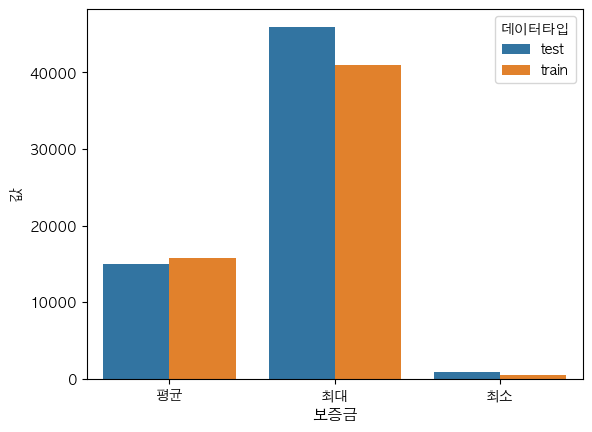

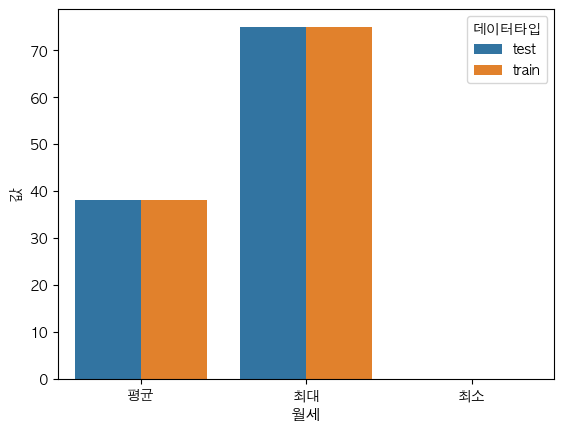

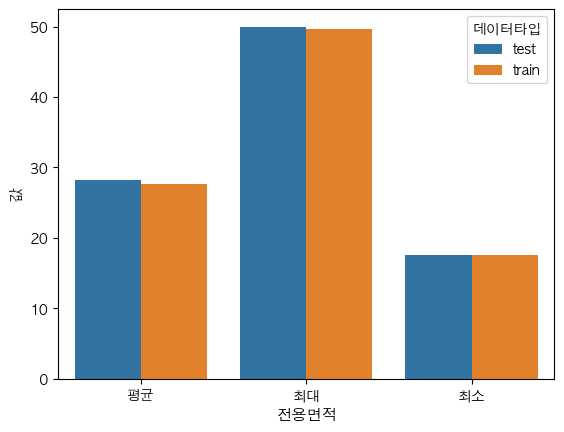

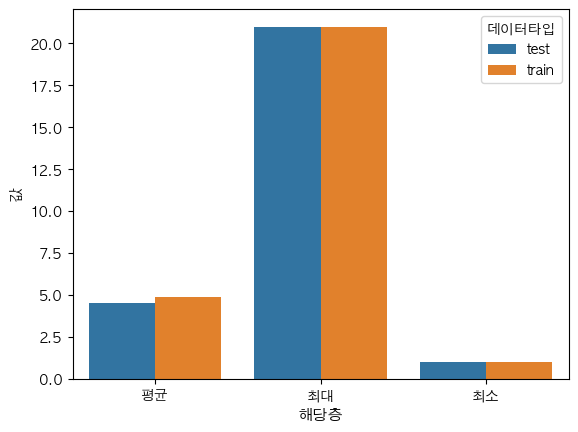

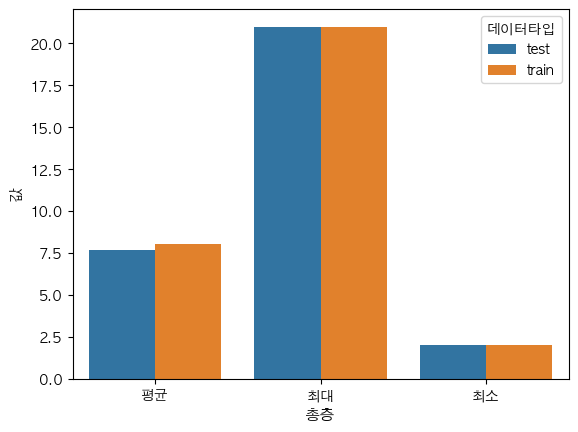

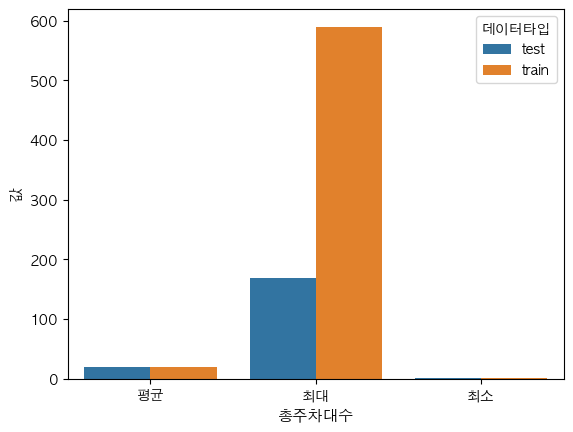

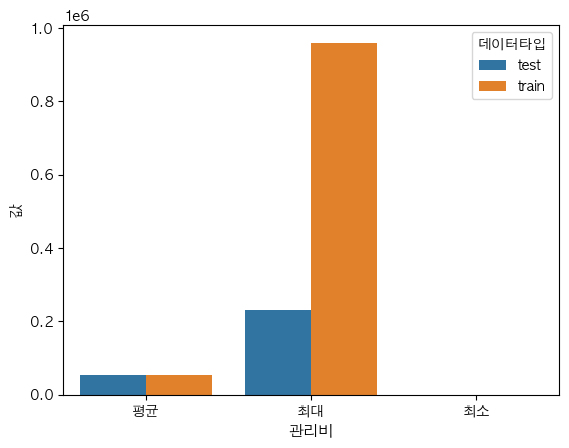

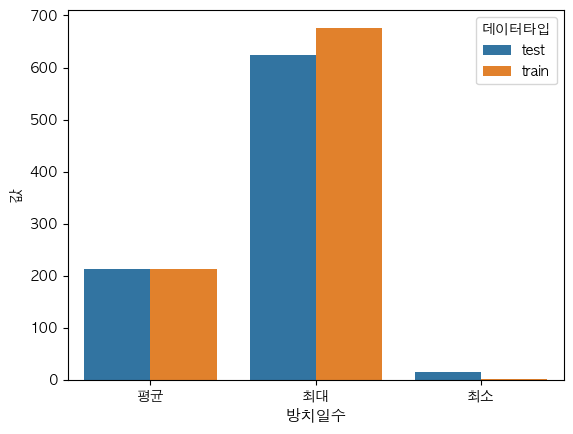

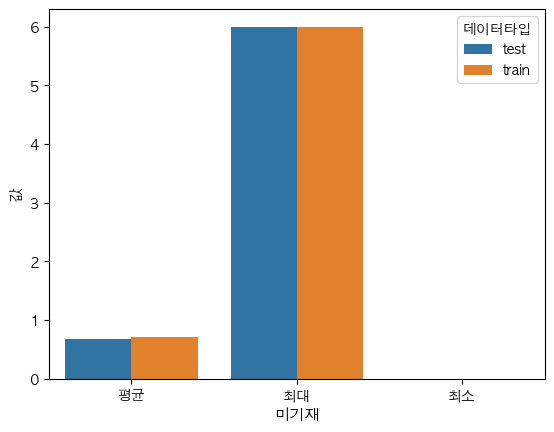

In [39]:
# numerical = ['보증금', '월세', '전용면적', '해당층', '총층', '방수', '욕실수', '총주차대수', '관리비', '방치일수', '미기재', '게재일']
numerical = ['보증금', '월세', '전용면적', '해당층', '총층', '총주차대수', '관리비', '방치일수', '미기재']

for colname in numerical:
    get_mean_max_min_graph_of_numerical_variable(colname)

## 📍 범주형 변수

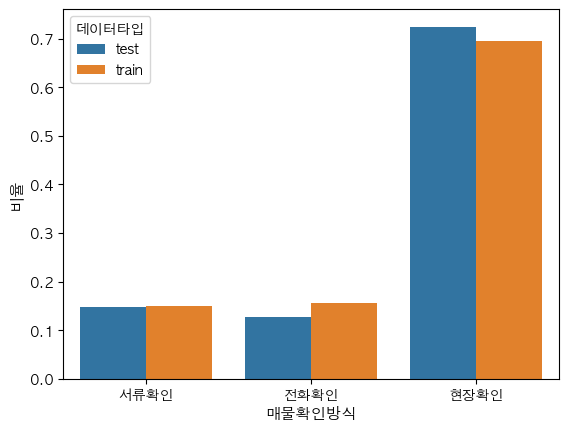

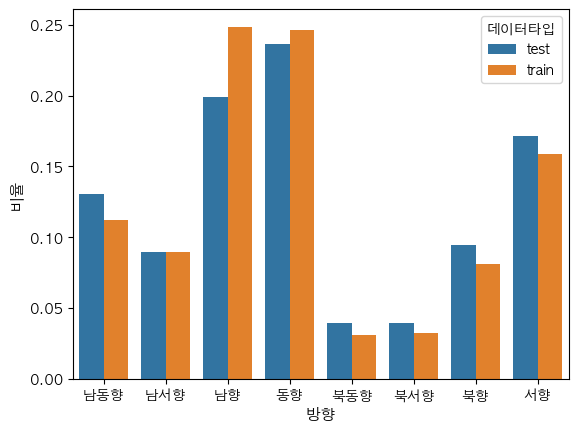

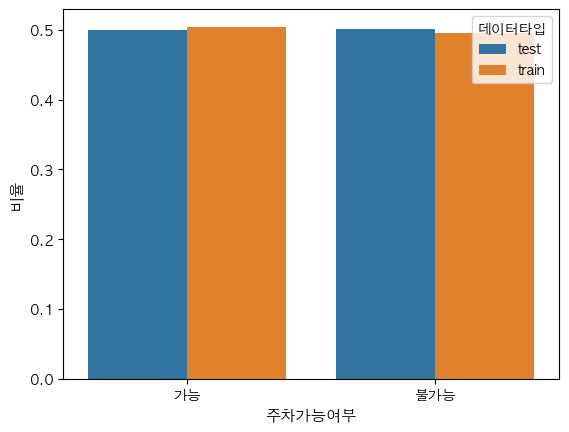

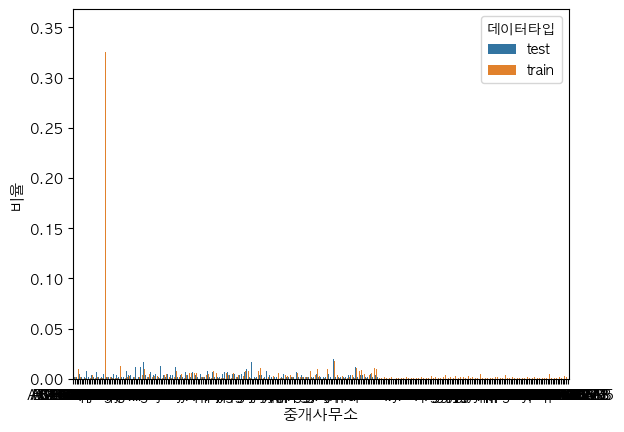

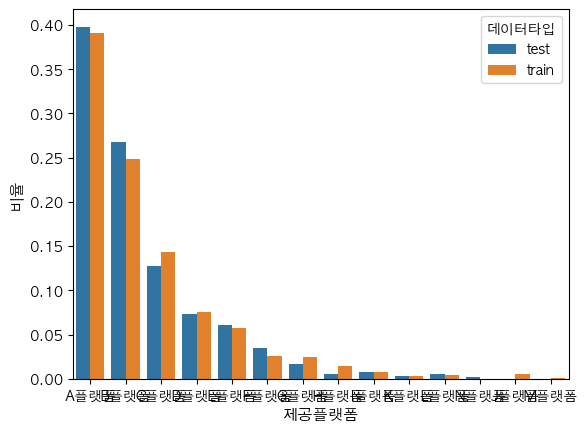

In [40]:
categorical = ['매물확인방식', '방향', '주차가능여부', '중개사무소', '제공플랫폼']

for colname in categorical:
    get_frequency_graph_of_categorical_variable(colname)

In [41]:
# sns.histplot(data=train_data, x='집세', hue='허위매물여부', kde=True, multiple='layer')